In [30]:
import numpy as np
import pandas as pd
import os

current_dir = os.getcwd()
data_path = current_dir+'\\BikeData\\'
train_data = pd.read_csv(data_path+'train.csv')
test_data = pd.read_csv(data_path+'test.csv')
submission_data = pd.read_csv(data_path+'sampleSubmission.csv')

In [2]:
train_data.shape, test_data.shape

((10886, 12), (6493, 9))

In [3]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
submission_data.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [8]:
# spliting datetime data 
train_data['date'] = train_data['datetime'].apply(lambda x: x.split()[0])
train_data['year'] = train_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train_data['month'] = train_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train_data['day'] = train_data['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train_data['hour'] = train_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train_data['minute'] = train_data['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train_data['second'] = train_data['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [9]:
# getting weekday
from datetime import datetime
import calendar

train_data['weekday'] = train_data['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])



In [28]:
# convert season and weather using map function
train_data['season'] = train_data['season'].map({1: 'Spring',2: 'Summer', 3: 'Fall', 4: 'Winter'})
train_data['weather'] = train_data['weather'].map({1: 'Clear', 2: 'Mist, Few clouds', 3: 'Light Snow, Rain, Thunderstorm', 4: 'Heavy Rain, Thunderstorm, Snow, Fog'})


In [29]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,NaN,0,0,NaN,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,NaN,0,0,NaN,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,NaN,0,0,NaN,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,NaN,0,0,NaN,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,NaN,0,0,NaN,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [11]:
# visualization of the data for exploration
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\bluea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bluea\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


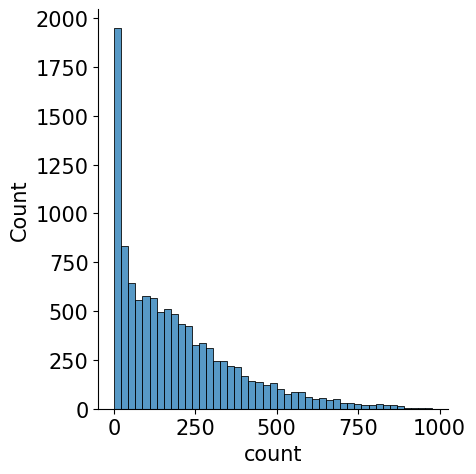

In [12]:
mpl.rc('font', size=15)
sns.displot(train_data['count'])

C:\Users\bluea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bluea\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


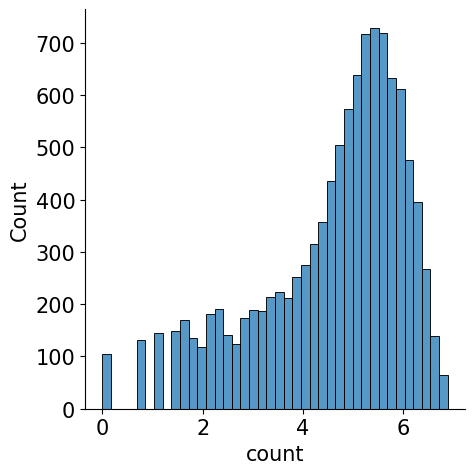

In [13]:
sns.displot(np.log(train_data['count']))

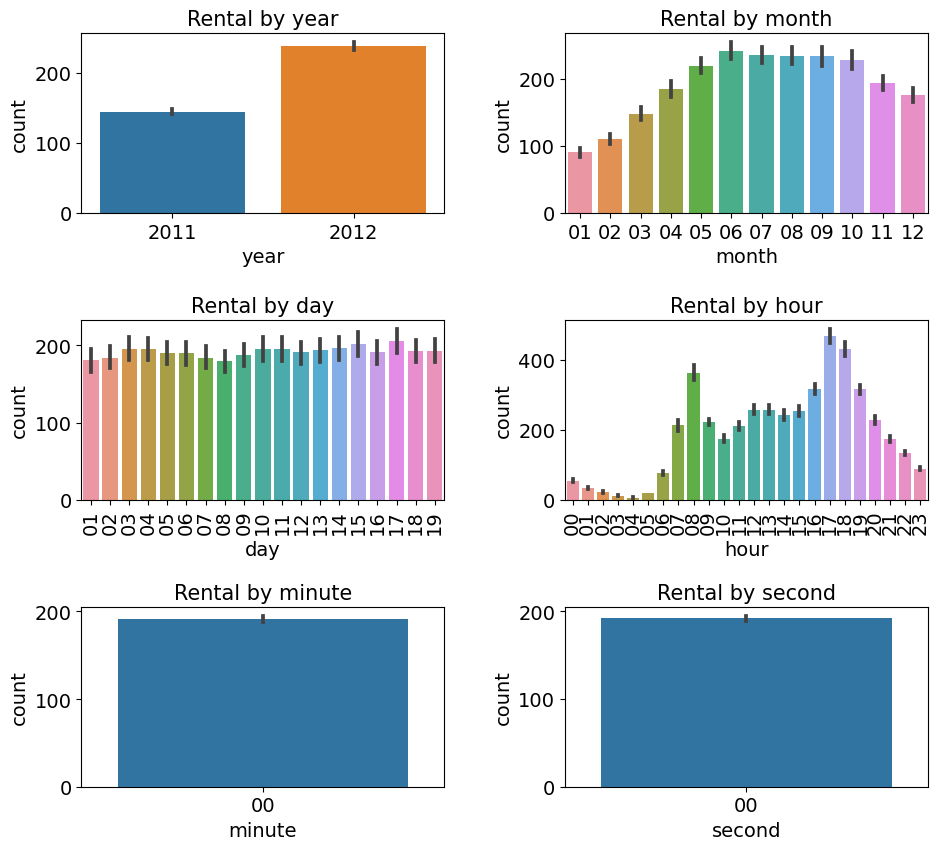

In [14]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,9)
sns.barplot(x='year', y='count', data=train_data, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train_data, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train_data, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train_data, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train_data, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train_data, ax=axes[2,1])

axes[0, 0].set(title='Rental by year')
axes[0, 1].set(title='Rental by month')
axes[1, 0].set(title='Rental by day')
axes[1, 1].set(title='Rental by hour')
axes[2, 0].set(title='Rental by minute')
axes[2, 1].set(title='Rental by second')

axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

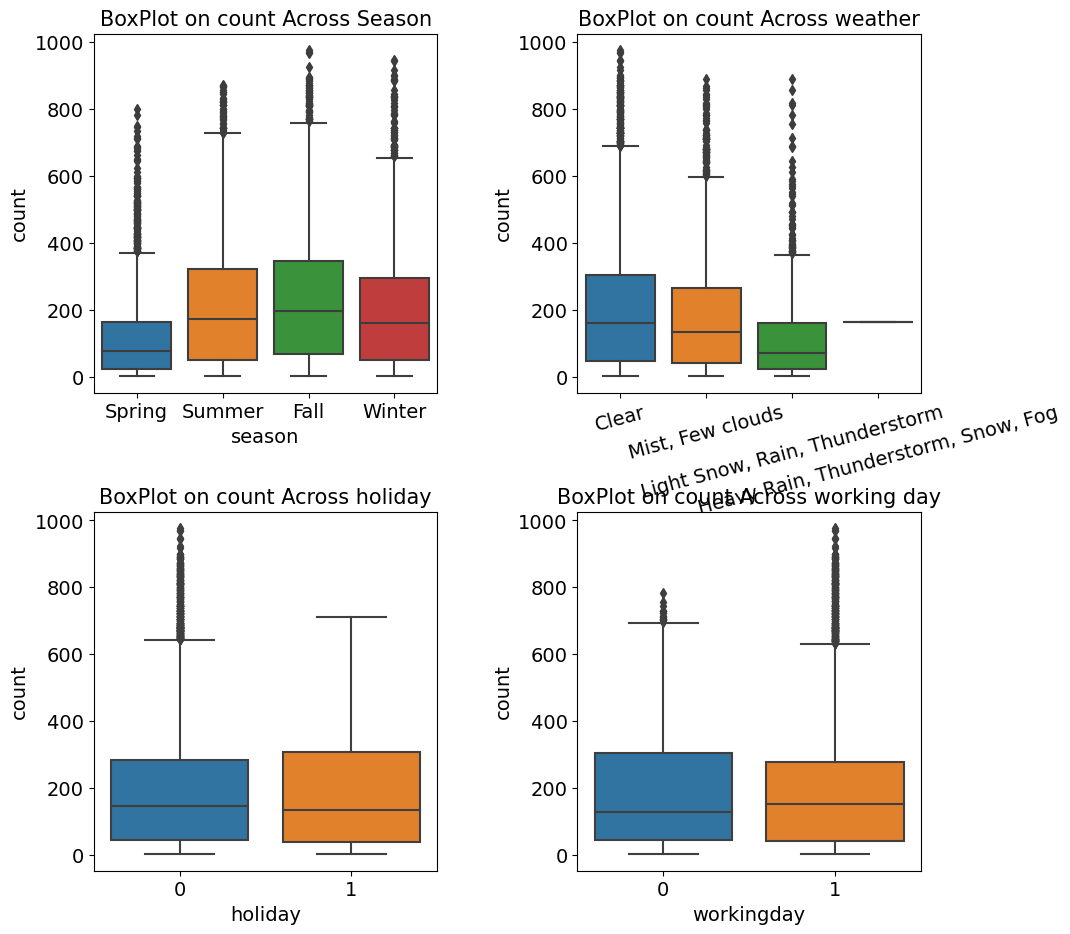

In [15]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,10)

sns.boxplot(x='season', y='count', data= train_data, ax=axes[0,0])
sns.boxplot(x='weather', y='count', data= train_data, ax=axes[0,1])
sns.boxplot(x='holiday', y='count', data= train_data, ax=axes[1,0])
sns.boxplot(x='workingday', y='count', data= train_data, ax=axes[1,1])
            
axes[0,0].set(title='BoxPlot on count Across Season')
axes[0,1].set(title='BoxPlot on count Across weather')
axes[1,0].set(title='BoxPlot on count Across holiday')
axes[1,1].set(title='BoxPlot on count Across working day')

axes[0, 1].tick_params(axis='x', labelrotation=15 )

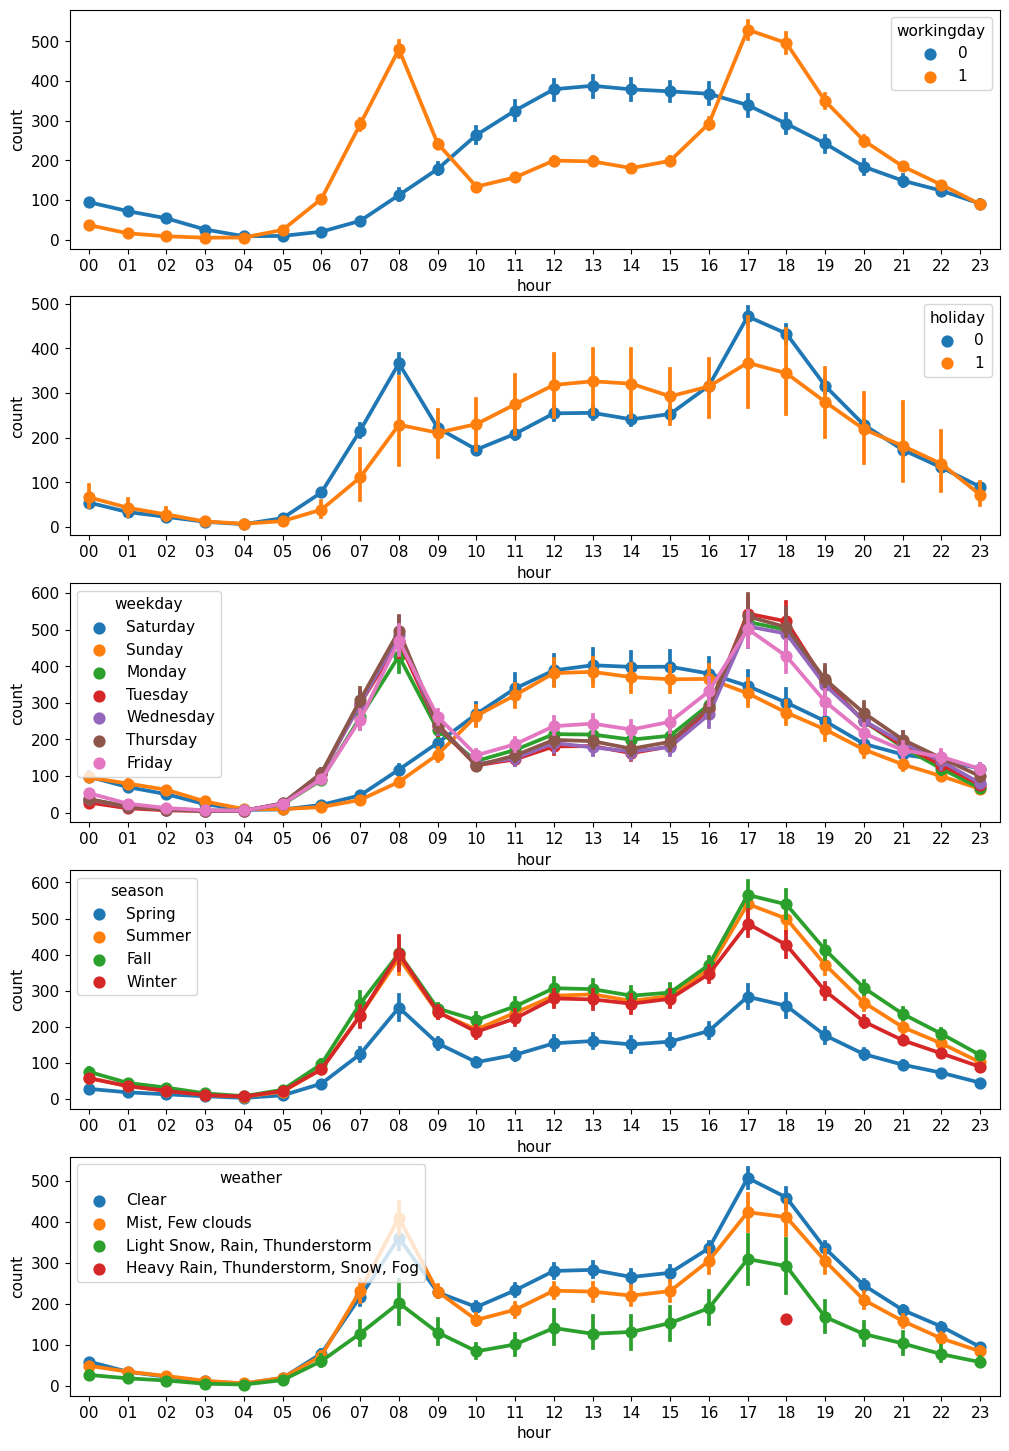

In [16]:
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

sns.pointplot(x='hour', y='count', data=train_data, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train_data, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train_data, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train_data, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train_data, hue='weather', ax=axes[4]);

<Axes: xlabel='humidity', ylabel='count'>

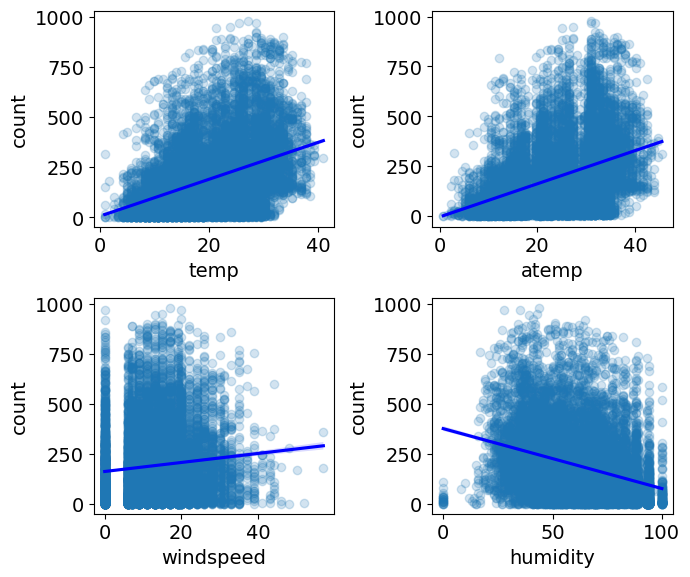

In [17]:
mpl.rc('font', size=14)
figure, axes = plt.subplots(nrows =2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7,6)

sns.regplot(x='temp', y= 'count', data=  train_data, ax=axes[0,0], scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='atemp', y= 'count', data=  train_data, ax=axes[0,1], scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='windspeed', y= 'count', data=  train_data, ax=axes[1,0], scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='humidity', y= 'count', data=  train_data, ax=axes[1,1], scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})

[Text(0.5, 1.0, 'Heatmap between numerical data')]

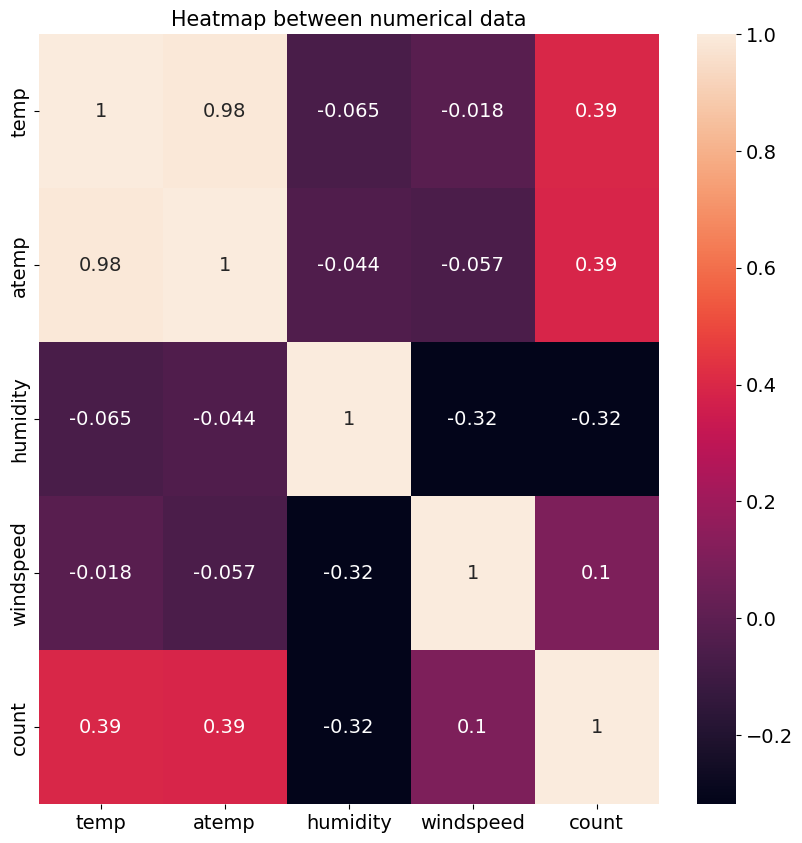

In [18]:
corrMat = train_data[['temp', 'atemp','humidity','windspeed', 'count']].corr()
fig, axes= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, annot=True)
axes.set(title='Heatmap between numerical data')

In [33]:
# base line model
train_data = pd.read_csv(data_path + 'train.csv')
test_data = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

train_data=train_data[train_data['weather']!=4]
all_data = pd.concat([train_data, test_data], ignore_index=True)


In [35]:
# spliting datetime data 
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])


In [42]:
all_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour
0,1,0,0,1,9.84,14.395,81,16.0,2011,00
1,1,0,0,1,9.02,13.635,80,40.0,2011,01
2,1,0,0,1,9.02,13.635,80,32.0,2011,02
3,1,0,0,1,9.84,14.395,75,13.0,2011,03
4,1,0,0,1,9.84,14.395,75,1.0,2011,04


In [36]:
#Drop unnecessary features
drop_features = ['casual', 'registered', 'datetime','date', 'month', 'windspeed']
all_data= all_data.drop(drop_features, axis=1)

In [43]:
# split training and testing data
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]
# Drop the target value (count)
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)
y = train_data['count'] 

In [46]:
# A function to compute RMSLE
def rmsle(y_true, y_pred, convertExp=True):
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    result = np.sqrt(np.mean((log_true- log_pred)**2))
    return result

In [44]:
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
log_y = np.log(y) #Convert target to log value 
linear_reg_model.fit(X_train, log_y) 

LinearRegression()

In [47]:
preds = linear_reg_model.predict(X_train) 
print (f'RMSLE for linear regression: {rmsle(log_y, preds, True):.4f}')

RMSLE for linear regression: 1.0210


In [48]:
#Adding Ridge and GridSearch
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
ridge_model = Ridge()

In [49]:
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200,
300, 400, 800, 900, 1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

In [50]:
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model, param_grid=ridge_params, scoring=rmsle_scorer, cv=5)

In [51]:
gridsearch_ridge_model.fit(X_train, log_y) 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [53]:
print ('Best parameters by Ridge and GridSearch:' , gridsearch_ridge_model.best_params_)

RMSLE for Ridge and GridSearch: {'alpha': 0.1, 'max_iter': 3000}


In [54]:
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)
print(f'RMSLE using Ridge : {rmsle(log_y, preds, True):.4f}')

RMSLE using Ridge : 1.0210


In [55]:
#Lasso
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900,1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
 param_grid=lasso_params,
 scoring=rmsle_scorer,
 cv=5)
gridsearch_lasso_model.fit(X_train, log_y)
print('best parameters by Rasso :', gridsearch_lasso_model.best_params_)


best parameters by Rasso : {'alpha': 0.001, 'max_iter': 3000}


In [56]:
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)
print(f'RMSLE using Lasso : {rmsle(log_y, preds, True):.4f}')

RMSLE using Lasso : 1.0210


In [58]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
randomforest_model = RandomForestRegressor()
rf_params = {'n_estimators':[100, 120, 140]} # 1
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
 param_grid=rf_params,
 scoring=rmsle_scorer,
 cv=5)

gridsearch_random_forest_model.fit(X_train, log_y)
print('best parameters for Ramdom Forest :', gridsearch_random_forest_model.best_params_)

best parameters for Ramdom Forest : {'n_estimators': 100}


In [59]:
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)
print(f'RMSLE uisng RandomForest : {rmsle(log_y, preds, True):.4f}')

RMSLE uisng RandomForest : 0.1315
